In [1]:
# =============================================================================
# Imports
# =============================================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# =============================================================================
# Paths and Variables
# =============================================================================

path = 'https://raw.githubusercontent.com/crajapax/GDAtrack3b/main/GlobalTemperatures.csv'

# =============================================================================
# Open data file
# =============================================================================

global_temp_df = pd.read_csv(path)
global_temp_df.head()


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


Do some Exploratory Data Analysis and understand your columns.

Steps for TimeSeries Modelleing:
1. figure out what you want your model to predict, what would be an interesting variable to look at
2. transform time series data and define variable you want to predict
3. normalize/standardize observations
4. Transform the time series into a supervised learning problem. Specifically, the organization of data into input and output patterns where the observation at the previous time step is used as an input to forecast the observation(s) at the current/future time steps
5. split train, validation and testset by time to avoid dataleakage of futue information into your trainset

In [7]:
# =============================================================================
# Print columns of dataframe
# =============================================================================

global_temp_df_cols = global_temp_df.columns

print(global_temp_df_cols)

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')


In [4]:
global_temp_df_cols

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [8]:
global_temp_df.shape

(3192, 9)

In [6]:
# =============================================================================
# Get overview of data - NaNs
# =============================================================================

global_temp_df.isna().sum()


dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [16]:
# =============================================================================
# Let's focus on three rows: 
#
#       - dt (Date)
#       - LandAverageTemperature
#       - LandAverageTemperatureUncertainty
#
# Create the sub dataframe containg only these rows
# =============================================================================



#print new dataframe column
data = global_temp_df.loc[:,["dt","LandAverageTemperature", ""]]

In [15]:
data

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072
...,...,...,...
3187,2015-08-01,14.755,0.072
3188,2015-09-01,12.999,0.079
3189,2015-10-01,10.801,0.102
3190,2015-11-01,7.433,0.119


In [23]:
nan1= data[data['LandAverageTemperature'].isna()]
nan2= data[data['LandAverageTemperatureUncertaintydate'].isna()]

In [24]:
# =============================================================================
# Now let's look where the NaNs are in our two feature columns 
# =============================================================================


print('\nNaNs in LandAverageTemperature are in rows: ')
print(data[data["LandAverageTemperature"].isna()])


print('\nNaNs in LandAverageTemperatureUncertainty are in rows: ')
print(data[data["LandAverageTemperatureUncertainty"].isna()])



NaNs in LandAverageTemperature are in rows: 
            dt  LandAverageTemperature  LandAverageTemperatureUncertainty
10  1750-11-01                     NaN                                NaN
16  1751-05-01                     NaN                                NaN
18  1751-07-01                     NaN                                NaN
21  1751-10-01                     NaN                                NaN
22  1751-11-01                     NaN                                NaN
23  1751-12-01                     NaN                                NaN
25  1752-02-01                     NaN                                NaN
28  1752-05-01                     NaN                                NaN
29  1752-06-01                     NaN                                NaN
30  1752-07-01                     NaN                                NaN
31  1752-08-01                     NaN                                NaN
32  1752-09-01                     NaN                            

In [28]:
# =============================================================================
# Remove rows before and including 1752-09-01
# =============================================================================

print('\nNr of data before removing nan-rows: ', len(data))

global_temp_df = data[data['dt']>'1752-09-01']

print('Nr of data after removing nan-rows:  ', len(global_temp_df))

global_temp_df.isna().sum()



Nr of data before removing nan-rows:  3192
Nr of data after removing nan-rows:   3159


dt                                   0
LandAverageTemperature               0
LandAverageTemperatureUncertainty    0
dtype: int64

Run the following 4 Codeblocks and Discuss what you observe in the plots

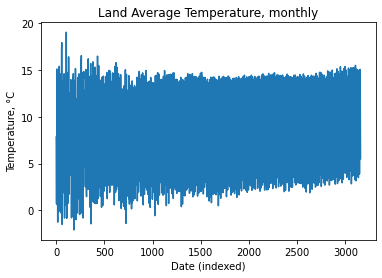

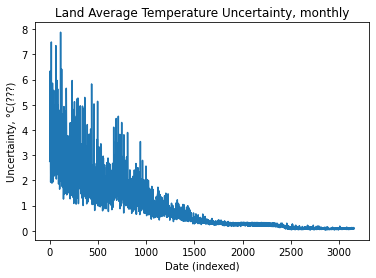

In [29]:
# =============================================================================
# Visualization of data, if yo used another dataframe name, replace it in the following code 
# with global_temp_df
# =============================================================================

land_av_temp = global_temp_df.LandAverageTemperature.values
land_av_uncertainty = global_temp_df.LandAverageTemperatureUncertainty
x = np.arange(land_av_temp.shape[0])
x_date = global_temp_df.dt.values

plt.plot(x, land_av_temp)
plt.title('Land Average Temperature, monthly')
plt.xlabel('Date (indexed)')
plt.ylabel('Temperature, °C')
plt.show()

plt.plot(x, land_av_uncertainty)
plt.title('Land Average Temperature Uncertainty, monthly')
plt.xlabel('Date (indexed)')
plt.ylabel('Uncertainty, °C(???)')
plt.show()


In [31]:
land_av_temp.shape

(3159,)

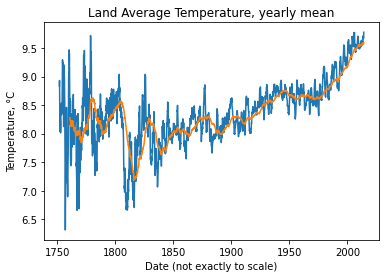

In [32]:
# =============================================================================
# TO get a more interesting sequence for our Prediction, we will use the Average Temperature data (12 month)
# =============================================================================


# Function to transform sequence data to moving_average
# Returns numpy array
def moving_average(seq, seq_length):
    seq_av = []
    for i in range(seq_length, seq.shape[0]):
        av_temp = np.mean(seq[i - seq_length : i])
        seq_av.append(av_temp)
        
    return np.array(seq_av)

# land_av_temp_averaged = []

# for i in range(land_av_temp.shape[0] - 12):
#     av_temp = np.mean(land_av_temp[i : i + 12])
#     land_av_temp_averaged.append(av_temp)
    
# x is the preparation for plottin - creating x values for the plot
# moving average is computed over 12 months
land_av_temp_averaged = moving_average(land_av_temp, 12)
x = np.arange(land_av_temp_averaged.shape[0]) / 12 + 1752

# x is the preparation for plottin - creating x values for the plot - this time moving average over 120 records
# moving average is computed over 120 months = 10 years
land_av_temp_averaged_120 = moving_average(land_av_temp, 120)
x_120 = np.arange(land_av_temp_averaged_120.shape[0]) / 12 + 1752

offset = x.shape[0] - x_120.shape[0]

plt.plot(x, land_av_temp_averaged)
plt.plot(x_120 + int(offset / 12), land_av_temp_averaged_120)
plt.title('Land Average Temperature, yearly mean')
plt.xlabel('Date (not exactly to scale)')
plt.ylabel('Temperature, °C')
plt.show()

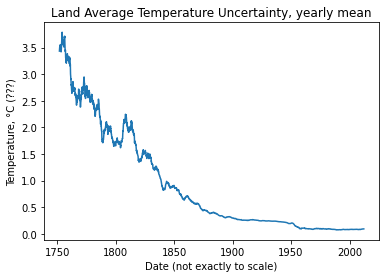

In [33]:
land_av_uncertainty_averaged = moving_average(land_av_uncertainty, 36)
x = np.arange(land_av_uncertainty_averaged.shape[0]) / 12 + 1752

plt.plot(x, land_av_uncertainty_averaged)
plt.title('Land Average Temperature Uncertainty, yearly mean')
plt.xlabel('Date (not exactly to scale)')
plt.ylabel('Temperature, °C (???)')
plt.show()

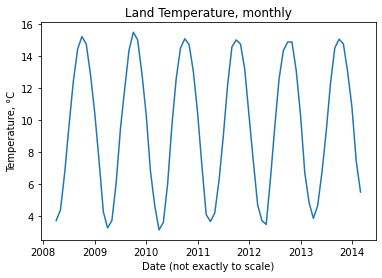

In [34]:
# =============================================================================
# Temperature data, monthly, last 72 month
# =============================================================================

x = np.arange(land_av_temp_averaged.shape[0]) / 12 + 1752

plt.plot(x[-72:], land_av_temp[-72:])
plt.title('Land Temperature, monthly')
plt.xlabel('Date (not exactly to scale)')
plt.ylabel('Temperature, °C')
plt.show()

Now, build your DataInput.
We want to predict based on 60 temperature datapoints, the following 10 datapoints. 

In [35]:
# =============================================================================
# Let's build our sequences now - in the following way:
#
#   - From each value in our feature-sequence, we take the last 60 month
#     as features and the next 10 monnth as labels
#
# =============================================================================

# Creating x sequence -> 60 measures
# Creating y sequence -> 10 measures (following the 60)
x_sequences = []
y_sequences = []

# We move by 1 to the right
for i in range(60, land_av_temp.shape[0] - 10):
    x_sequences.append(land_av_temp[i-60:i])
    y_sequences.append(land_av_temp[i:i+10])

# Note: there's "TimeSeriesGenerator" function which does this in Keras.

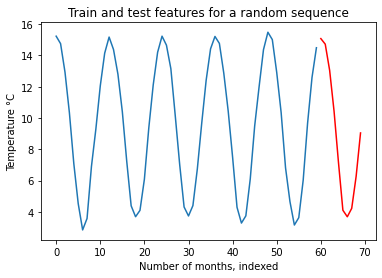

In [37]:
# TODO: Test sequences
# =============================================================================
# Visualize sequences
# =============================================================================
    
index = np.random.randint(len(x_sequences))
sx = x_sequences[index]
sy = y_sequences[index]


x_1 = np.arange(len(sx))
x_2 = np.arange(len(sy))

plt.plot(x_1, sx)
plt.title('Train and test features for a random sequence')
plt.xlabel('Number of months, indexed')
plt.ylabel('Temperature °C')
plt.plot(x_1.shape[0] + x_2, sy, color='r')
plt.show()

In [40]:
print(f"Shape of x_sequences: {np.array(x_sequences).shape}")
print(f"Shape of y_sequences: {np.array(y_sequences).shape}")

Shape of x_sequences: (3089, 60)
Shape of y_sequences: (3089, 10)


In [52]:
# =============================================================================
# Now let's split out sequences into training and test data
# =============================================================================

train_size = 0.8
test_size = 0.2

# Making train_split index = 0.8 * size of dataset
train_split = int(len(x_sequences)*train_size)

# Splitting the x
# to avoid overlapping the train and test set we need to remove the last 60 datapoints from train
x_train = np.array(x_sequences[:train_split-60])
x_test  = np.array(x_sequences[train_split:])

# Splitting the y
y_train = np.array(y_sequences[:train_split-60])
y_test  = np.array(y_sequences[train_split:])

# Expand dimensions for usage in keras

# Reshaping this for Keras
# We need it in 3D:
#  - number of data points
#  - size of sequence
#  - number of features
# Number of features = 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# it should not be done for y, y should be 2-dimensional

# TODO: Take out data leakage overlap...
# even better to split into train & test before creating the sequences

print('\nShape of x_train:            ', x_train.shape)
print('Shape of y_train:            ', y_train.shape)
print('Shape of x_test:             ', x_test.shape)
print('Shape of y_test:             ', y_test.shape)


Shape of x_train:             (2411, 60, 1)
Shape of y_train:             (2411, 10)
Shape of x_test:              (618, 60, 1)
Shape of y_test:              (618, 10)


In [64]:
# =============================================================================
# Build a model
# =============================================================================


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

model = Sequential()

# Remember to keep the shape of the x_train to ( sequence_size(60), num_features(1) )
model.add(LSTM(50, input_shape=(x_train.shape[1], 1), activation='tanh'))

# Adding regularization (BatchNormalization + Dropout)
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer (10 units)
# No activation function -> this is a regression problem
model.add(Dense(units=y_train.shape[1]))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 11,110
Trainable params: 11,010
Non-trainable params: 100
_________________________________________________________________
None


In [65]:
# =============================================================================
# Compile and train model
# =============================================================================

from tensorflow.keras.optimizers import Adam

# use adam with lr 0.001
optim = Adam(lr=0.001)

# use metrics 'mean_absolute_percentage_error'
metrics = ["mean_absolute_percentage_error"]

loss = "mean_squared_error"

# use 100 epochs, 64 batch size, 
batch_size = 64
epochs = 100

model.compile(
    optimizer=optim,
    metrics=metrics,
    loss=loss
)

In case of stateless RNN, the validation split can be used like below, even with `shuffle=True`.

In case of stateful RNN, we shoudln't simply use the `validation_split` like this. We should treat it the same way as train/test split, i.e. validation data is following timewise the end of the train data (no shuffling allowed).

In [ ]:
# =============================================================================
# Callbacks you could use and put into the fit method to improve learning (ReduceLearningRate on Plateau)
# =============================================================================
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
rlop = ReduceLROnPlateau(monitor='val_loss', factor=0.2, \
                         patience=7, verbose=1, min_lr=0.0001)
                         

In [66]:
story = model.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.3,
    shuffle=False
    )

Epoch 1/100
27/27 [==============================] - 7s 118ms/step - loss: 81.0464 - mean_absolute_percentage_error: 115.2597 - val_loss: 87.6679 - val_mean_absolute_percentage_error: 101.0811
Epoch 2/100
27/27 [==============================] - 2s 69ms/step - loss: 71.0776 - mean_absolute_percentage_error: 140.7579 - val_loss: 83.9397 - val_mean_absolute_percentage_error: 101.5933
Epoch 3/100
27/27 [==============================] - 2s 74ms/step - loss: 66.3420 - mean_absolute_percentage_error: 155.6717 - val_loss: 78.5991 - val_mean_absolute_percentage_error: 102.6094
Epoch 4/100
27/27 [==============================] - 2s 82ms/step - loss: 62.6266 - mean_absolute_percentage_error: 163.6666 - val_loss: 71.7342 - val_mean_absolute_percentage_error: 101.9926
Epoch 5/100
27/27 [==============================] - 2s 75ms/step - loss: 58.6359 - mean_absolute_percentage_error: 163.9565 - val_loss: 63.9725 - val_mean_absolute_percentage_error: 98.3858
Epoch 6/100
27/27 [=====================

In [67]:
# This function will retrieve and plot all observed model performance metrics
def show_history(s, suptitle="", scale = "linear"):
    
    # Automatically retrieve list of all metrics from history
    metrics = list(s.history.keys())[:len(list(s.history.keys()))//2]

    # Calculate amount of metrics
    nrows = len(metrics)

    # Set figure size to 12 x N*5 (where N is number of metrics [nrows])
    fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=(12, 5 * nrows))

    fig.suptitle(suptitle)

    index = -1

    for metric in metrics:
        index+=1

        axs[index].plot(s.history[metric], label=metric)
        axs[index].plot(s.history["val_"+metric], label="val_"+metric)
        axs[index].set_yscale(scale)
        axs[index].legend()
        axs[index].grid(b=True, which="major", axis="y")
        axs[index].set_title("Observed "+metric)
    
    plt.show()
    plt.close()

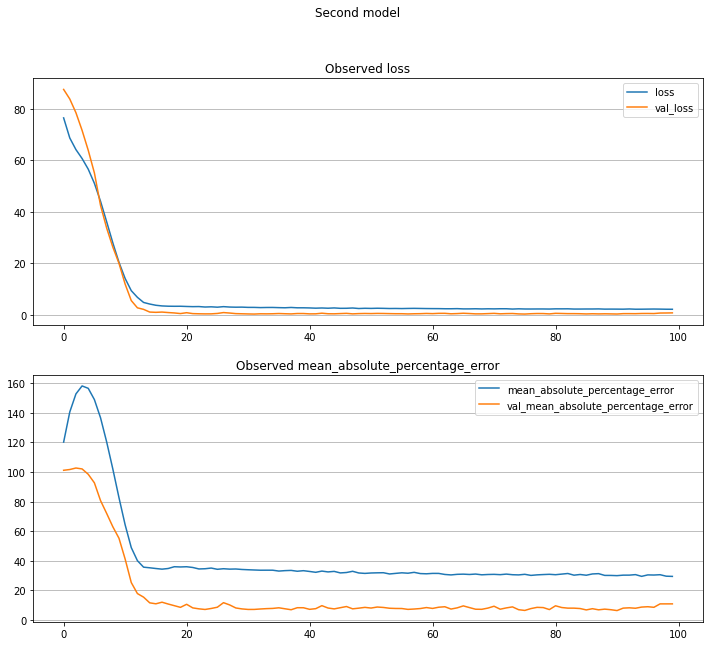

In [68]:
show_history(story, "Second model")

In [62]:
story.history.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

In [69]:
# =============================================================================
# Evaluate model
# =============================================================================

loss, mape = model.evaluate(
    x=x_test,
    y=y_test,
    batch_size=None,
    verbose=1
)

print('\nLoss on test set:                            ', loss)
print('Mean average percentage error on test set:   ', mape)



20/20 [==============================] - 0s 13ms/step - loss: 1.7698 - mean_absolute_percentage_error: 16.9878

Loss on test set:                             1.7697519063949585
Mean average percentage error on test set:    16.987817764282227


In [75]:
# =============================================================================
# Get predictions
# =============================================================================

#yhat = model.predict(np.array(x_sequences[-60:]).reshape(1, 60, 1))
yhat = model.predict(x_test)

In [84]:
yhat.shape

(618, 10)

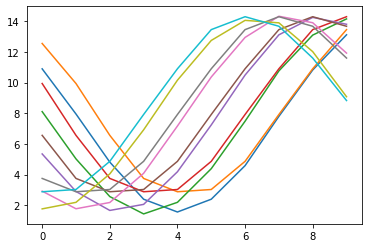

In [89]:
for i in range(5):
    plt.plot(yhat[i])
    plt.plot(y_test[i])

plt.show()

# OPTIONAL 1: 

In [ ]:
#take 10 random sampels from testset, make a prediction and plot the temperature forecast in red and the true temperature
# hint use the following random number generator from numpy  
index = np.random.randint(pred.shape[0])


# OPTIONAL 2: 
try to set up your sequence on your own using 
'keras.preprocessing.timeseries_dataset_from_array' and also using a validation set, that does not contain information leakage. See examples and help in here: https://keras.io/examples/timeseries/timeseries_weather_forecasting/

# OPTIONAL 3: 
[Stateful vs Stateless LSTMs](https://machinelearningmastery.com/stateful-stateless-lstm-time-series-forecasting-python/)
As a good experiment,  explore whether maintaining state in the LSTM adds value over not maintaining state.
The benefit of LSTM networks is their ability to maintain state and learn a sequence.
Expectation would therefore be  that the stateful LSTM will outperform the stateless LSTM.
Shuffling in RNNs


"Stateful" is a choice. If you believe that the last N observations are all you need to predict  future observation, then you can train with stateless and sequence length=N (this means you are free to shuffle your sequences). Otherwise, you should look into using a stateful approach to allow the hidden state to persist across batches. 

Remark: 
**Shuffling in RNNs **

In general, when you shuffle the training data (a set of sequences), you shuffle the order in which sequences are fed to the RNN, you don't shuffle the ordering within individual sequences. This is fine to do when your network is stateless:
**Stateless Case:**
The network's memory only persists for the duration of a sequence. Training on sequence B before sequence A doesn't matter because the network's memory state does not persist across sequences.
On the other hand:
**Stateful Case:**
The network's memory persists across sequences. Here, you cannot blindly shuffle your data and expect optimal results. Sequence A should be fed to the network before sequence B because A comes before B, and we want the network to evaluate sequence B with memory of what was in sequence A.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87989bd7-7a25-4e61-b3c0-cb24ea7ca1f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>